# MPL Classifier

### Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier

### Data Preprocessing

Step 1: Convert to Pandas dataset

In [2]:
def convert(breast_cancer):
    data = np.c_[breast_cancer.data, breast_cancer.target]
    columns = np.append(breast_cancer.feature_names, ["target"])
    return pd.DataFrame(data, columns=columns)

Step 2: Split X and y

In [3]:
def splits_X_y(breast_cancer):
    cancer_data = convert(breast_cancer)
    X = cancer_data[cancer_data.columns[:-1]]
    y = cancer_data.target
    return X, y

Step 3: Split Train Test

In [4]:
def split_Test_Train(breast_cancer):
    X, y = splits_X_y(breast_cancer)
    return train_test_split(X, y, test_size=0.25, random_state=42)

Step 4: Apply Standardization

In [5]:
def Scaller(X_train,X_test):
    Standar_Scaller = StandardScaler()
    scalled_train_data= Standar_Scaller.fit_transform(X_train)
    scalled_test_data = Standar_Scaller.transform(X_test)
    return scalled_train_data,scalled_test_data

### MPL Classifier with bagging method

In [6]:
def bagging_clf(X_train,X_test,y_train,y_test):
    MLP = MLPClassifier(hidden_layer_sizes=[100,100,100], activation='relu',solver='lbfgs',
                              tol=0.0001, max_iter=100)
    bag = BaggingClassifier(base_estimator=MLP,
                           n_estimators=100,
                           random_state=42)
    bag = bag.fit(X_train, y_train)
    y_predicted = bag.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_predicted)
    per = metrics.precision_score(y_test, y_predicted, average="macro")
    rec = metrics.recall_score(y_test, y_predicted, average="macro")
    f1 = metrics.f1_score(y_test, y_predicted, average="macro")
    print("\nBagging Results:")
    print("Accuracy: %2f" % acc)
    print("Precision: %2f"% per )
    print("Recall: %2f" % rec)
    print("F1: %2f" % f1)
    return acc,per,rec,f1

### Random Forest Classifier

In [7]:
def random_forest(X_train,X_test,y_train,y_test):
    RandomForest = RandomForestClassifier(random_state=42,criterion='gini', n_estimators = 10)
    RandomForest.fit(X_train, y_train)
    y_predicted = RandomForest.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_predicted)
    per = metrics.precision_score(y_test, y_predicted, average="macro")
    rec = metrics.recall_score(y_test, y_predicted, average="macro")
    f1 = metrics.f1_score(y_test, y_predicted, average="macro")
    print("\nRandom Forest Results:")
    print("Accuracy: %2f" % acc)
    print("Precision: %2f"% per )
    print("Recall: %2f" % rec)
    print("F1: %2f" % f1)
    return acc,per,rec,f1

### Bar - Plot

In [8]:
def bar_plot(accBag,perBag,recBag,f1Bag,accRF,perRF,recRf,f1RF):
    labels = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
    forest = [accBag,perBag,recBag,f1Bag]
    bagging = [accRF,perRF,recRf,f1RF]
    x = np.arange(len(labels))
    width = 0.35
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, forest, width, label='Bagging')
    rects2 = ax.bar(x + width/2, bagging, width, label='Random Forest')
    ax.set_ylabel('Metrics')
    ax.set_title('Random Forest vs Bagging Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.savefig("Bar_Plot.pdf")
    #autolabel(rects1)
    #autolabel(rects2)
    fig.tight_layout()   

### All Merge


Bagging Results:
Accuracy: 0.986014
Precision: 0.985123
Recall: 0.985123
F1: 0.985123

Random Forest Results:
Accuracy: 0.951049
Precision: 0.942623
Recall: 0.960674
F1: 0.949097


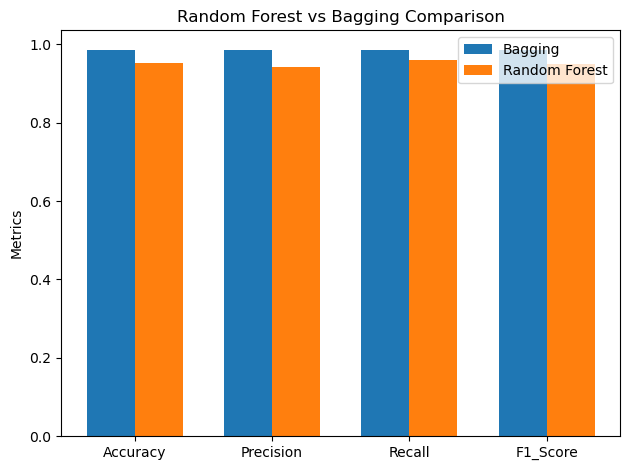

In [9]:
breast_cancer = datasets.load_breast_cancer()
X_train,X_test,y_train,y_test =  split_Test_Train(breast_cancer)
X_train,X_test = Scaller(X_train,X_test)
accBag,perBag,recBag,f1Bag = bagging_clf(X_train,X_test,y_train,y_test)
accRF,perRF,recRf,f1RF = random_forest(X_train,X_test,y_train,y_test)
bar_plot(accBag,perBag,recBag,f1Bag,accRF,perRF,recRf,f1RF)